In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ring_count = [int(a) for a in ["4", "6", "8", "12", "16", "32"]]
packets_count = [int (b) for b in ["1000", "2000", "3000", "4000", "5000", "10000", "20000", "30000", "40000", "100000", 
                                   "150000", "300000", "1000000"]]

In [3]:
unordered_information_good = []
unordered_information_que = []
unordered_information_separated = []

In [4]:
s_latency = dict()
with open("separated_que.txt", "r") as file:
    for line in file:
        if line.find("Main.measureName") != -1:
            lines = line.split()
            if len(lines) > 5:
                unordered_information_separated.append(float(lines[5].replace(",", ".")))
        if line.find("Count of Edges") != -1:
            lines = line.rstrip().split(" = ")
            count = int(lines[1].split()[0])
            packets_count = int(lines[2].split(",")[0])
            nanoseks = int(lines[-1])
            if (count, packets_count) in s_latency:
                s_latency[(count, packets_count)].append(nanoseks)
            else:
                s_latency[(count, packets_count)] = [nanoseks]

In [5]:
g_latency = dict()
with open("good.txt", "r") as file:
    for line in file:
        if line.find("Main.measureName") != -1:
            lines = line.split()
            if len(lines) > 5:
                unordered_information_good.append(float(lines[5].replace(",", ".")))
        if line.find("Count of Edges") != -1:
            lines = line.rstrip().split(" = ")
            count = int(lines[1].split()[0])
            packets_count = int(lines[2].split(",")[0])
            nanoseks = int(lines[-1])
            if (count, packets_count) in g_latency:
                g_latency[(count, packets_count)].append(nanoseks)
            else:
                g_latency[(count, packets_count)] = [nanoseks]

In [6]:
o_latency = dict()
with open("wait_queue.txt", "r") as file:
    for line in file:
        if line.find("Main.measureName") != -1:
            lines = line.split()
            if len(lines) > 5:
                unordered_information_que.append(float(lines[5].replace(",", ".")))
        if line.find("Count of Edges") != -1:
            lines = line.rstrip().split(" = ")
            count = int(lines[1].split()[0])
            packets_count = int(lines[2].split(",")[0])
            nanoseks = int(lines[-1])
            if (count, packets_count) in o_latency:
                o_latency[(count, packets_count)].append(nanoseks)
            else:
                o_latency[(count, packets_count)] = [nanoseks]

In [7]:
good_latency = dict()
for i, k in g_latency.items():
    good_latency[i] = np.array(k).mean()

In [8]:
sep_latency = dict()
for i, k in s_latency.items():
    sep_latency[i] = np.array(k).mean()

In [9]:
opt_latency = dict()
for i, k in o_latency.items():
    opt_latency[i] = np.array(k).mean()

In [10]:
ring_count = [int(a) for a in ["4", "6", "8", "12", "16", "32"]]
packets_count = [int (b) for b in ["1000", "2000", "3000", "4000", "5000", "10000", "20000", "30000", "40000", "100000", 
                                   "150000", "300000", "1000000"]]

In [11]:
dict_good = dict()
dict_sep = dict()
dict_que = dict()
count = 0
for r_c in ring_count:
    for p_c in packets_count:
        dict_good[(r_c, p_c)] = unordered_information_good[count]
        dict_que[(r_c, p_c)] = unordered_information_que[count]
        dict_sep[(r_c, p_c)] = unordered_information_separated[count]
        count += 1

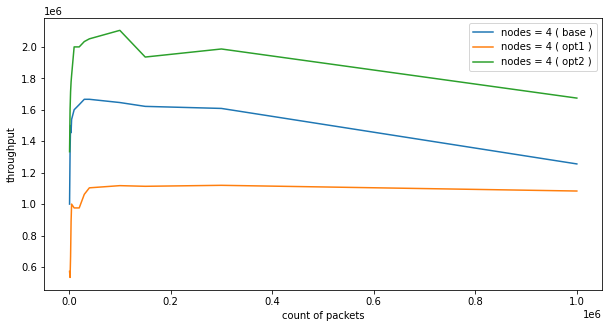

In [12]:
plt.figure(figsize=(10, 5))
for r_c in ring_count[0:1]:
    #plt.plot(packets_count, [dict_simple [(r_c, p_c)] / (p_c * r_c) for p_c in packets_count], label = "ring" + str(r_c) + "_simple")
    plt.plot(packets_count, [(p_c * r_c) /  dict_good[(r_c, p_c)] for p_c in packets_count], label = "nodes = " + str(r_c) + " ( base )")
    plt.plot(packets_count, [(p_c * r_c) /  dict_que[(r_c, p_c)] for p_c in packets_count], label = "nodes = " + str(r_c) + " ( opt1 )")
    plt.plot(packets_count, [(p_c * r_c) /  dict_sep[(r_c, p_c)] for p_c in packets_count], label = "nodes = " + str(r_c) + " ( opt2 )")
    plt.xlabel("count of packets")
    plt.ylabel("throughput")
plt.legend()


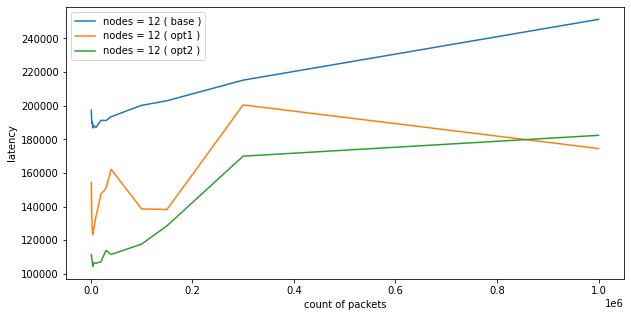

In [18]:
plt.figure(figsize=(10, 5))
for r_c in ring_count[3:4]:
    plt.plot(np.array(packets_count), [good_latency [(r_c, p_c)]  for p_c in packets_count], 
             label = "nodes = " + str(r_c) + " ( base )")
    plt.plot(np.array(packets_count), [opt_latency [(r_c, p_c)]  for p_c in packets_count], 
             label = "nodes = " + str(r_c) + " ( opt1 )")
    plt.plot(np.array(packets_count), [sep_latency [(r_c, p_c)]  for p_c in packets_count], 
             label = "nodes = " + str(r_c) + " ( opt2 )")
    plt.xlabel("count of packets")
    plt.ylabel("latency")
plt.legend()

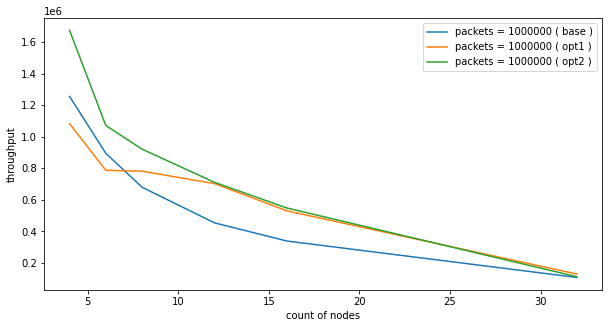

In [15]:
plt.figure(figsize=(10, 5))
for p_c in packets_count[-1:]:
    plt.plot(ring_count, [(p_c * r_c) /  dict_good [(r_c, p_c)] for r_c in ring_count], label = "packets = " + str(p_c) + " ( base )")
    plt.plot(ring_count, [(p_c * r_c) /  dict_que [(r_c, p_c)] for r_c in ring_count], label = "packets = " + str(p_c) + " ( opt1 )")
    plt.plot(ring_count, [(p_c * r_c) /  dict_sep [(r_c, p_c)] for r_c in ring_count], label = "packets = " + str(p_c) + " ( opt2 )")
    plt.xlabel("count of nodes")
    plt.ylabel("throughput")
plt.legend()

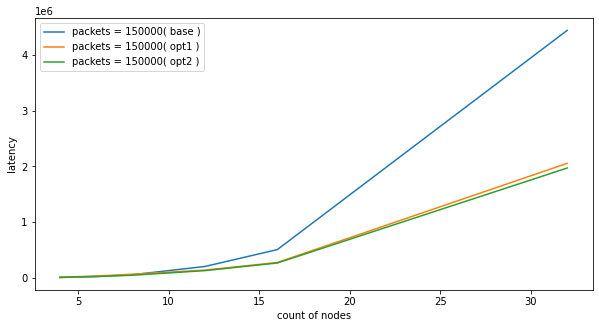

In [20]:
plt.figure(figsize=(10, 5))
for p_c in packets_count[-3:-2]:
    
    plt.plot(np.array(ring_count), [good_latency [(r_c, p_c)]  for r_c in ring_count], 
             label = "packets = " + str(p_c) + "( base )")
    plt.plot(np.array(ring_count), [opt_latency [(r_c, p_c)]  for r_c in ring_count], 
             label = "packets = " + str(p_c) + "( opt1 )")
    plt.plot(np.array(ring_count), [sep_latency [(r_c, p_c)]  for r_c in ring_count], 
             label = "packets = " + str(p_c) + "( opt2 )")
    plt.xlabel("count of nodes")
    plt.ylabel("latency")
plt.legend()
plt.legend()